In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm
import altair as alt
import numpy as np

In [2]:
loan = pd.read_csv('loan_data_default.csv')
loan

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [3]:
loan.rename(columns = {'Credit_Score' : 'credit_score',
                       'Upfront_charges' : 'down_payment',
                        'Status' : 'status',
                        'dtir1' : 'debt_to_income_ratio'
                        }, inplace = True)

loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,status,debt_to_income_ratio
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
columns= ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv','loan_purpose', 
          'Credit_Worthiness', 'open_credit','business_or_commercial','Interest_rate_spread', 
          'Neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 
          'occupancy_type', 'Secured_by', 'total_units','credit_type', 'co-applicant_credit_type', 'age',
          'submission_of_application', 'Region', 'Security_Type']

loan.drop(columns, axis = 1, inplace = True)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_type             148670 non-null  object 
 1   loan_amount           148670 non-null  int64  
 2   rate_of_interest      112231 non-null  float64
 3   down_payment          109028 non-null  float64
 4   term                  148629 non-null  float64
 5   property_value        133572 non-null  float64
 6   income                139520 non-null  float64
 7   credit_score          148670 non-null  int64  
 8   LTV                   133572 non-null  float64
 9   status                148670 non-null  int64  
 10  debt_to_income_ratio  124549 non-null  float64
dtypes: float64(7), int64(3), object(1)
memory usage: 12.5+ MB


In [5]:
loan_temp = loan

label = LabelEncoder()

colsCategorical = [col for col in loan_temp.columns if loan_temp[col].dtype == 'object']

for col in colsCategorical:
    loan_temp[col] = label.fit_transform(loan_temp[col])

In [6]:
def decision_tree(df):
    missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
    non_missing_cols = [col for col in df.columns if df[col].isnull().sum() == 0]

    for col in missing_cols:
 
        model = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 40, 
                                 max_samples = 1.0, max_features = 1.0, bootstrap = False, n_jobs = -1)

        col_missing = df[df[col].isnull()]
        temp = df.drop(df[df[col].isnull()].index, axis = 0)

        X = temp.loc[:, non_missing_cols]
        y = temp[col]

        model.fit(X, y)

        y_pred = model.predict(col_missing[non_missing_cols])
        df.loc[col_missing.index, col] = y_pred
        
    return df

loan_new = decision_tree(loan_temp)
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_type             148670 non-null  int32  
 1   loan_amount           148670 non-null  int64  
 2   rate_of_interest      148670 non-null  float64
 3   down_payment          148670 non-null  float64
 4   term                  148670 non-null  float64
 5   property_value        148670 non-null  float64
 6   income                148670 non-null  float64
 7   credit_score          148670 non-null  int64  
 8   LTV                   148670 non-null  float64
 9   status                148670 non-null  int64  
 10  debt_to_income_ratio  148670 non-null  float64
dtypes: float64(7), int32(1), int64(3)
memory usage: 11.9 MB


In [7]:
loan.describe()

,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV,status,debt_to_income_ratio
count,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,0.337876,3.311177e+05,4.126825,3283.018536,335.129850,4.962457e+05,6912.321917,699.789103,73.090457,0.246445,38.245013
std,0.649571,1.839093e+05,0.575869,3282.890244,58.409799,3.630219e+05,6358.281219,115.875857,40.246576,0.430942,10.825850
min,0.000000,1.650000e+04,0.000000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,0.000000,1.965000e+05,3.750000,756.112500,360.000000,2.680000e+05,3720.000000,599.000000,60.817308,0.000000,32.000000
50%,0.000000,2.965000e+05,4.000000,2732.220000,360.000000,4.180000e+05,5700.000000,699.000000,75.297619,0.000000,39.000000
75%,0.000000,4.365000e+05,4.500000,4657.676250,360.000000,6.180000e+05,8460.000000,800.000000,86.620077,0.000000,46.000000
max,2.000000,3.576500e+06,8.000000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
scaler.fit(loan.drop(["status", "loan_type"], axis = 1))
scaled_features = scaler.transform(loan.drop(['status', 'loan_type'], axis = 1))

In [10]:
loan1 = pd.DataFrame(scaled_features, columns = loan.columns[:-2])
loan1.head()

,loan_type,loan_amount,rate_of_interest,down_payment,term,property_value,income,credit_score,LTV
0,-1.166980,-0.153668,-0.053049,0.425789,-1.041940,-0.813481,0.502357,0.637034,0.623970
1,-0.677607,2.167470,-0.296163,0.425789,-0.794020,-0.303907,-1.275413,0.650701,-2.609043
2,0.409890,0.752213,-0.818799,0.425789,0.032379,0.403833,1.158234,0.172170,0.716342
3,0.681764,0.213894,-0.688308,0.425789,0.445579,0.781295,-0.973365,-0.092270,0.346855
4,1.986759,-0.220234,-1.000042,0.425789,0.721045,0.554818,-0.843916,0.467025,0.069739


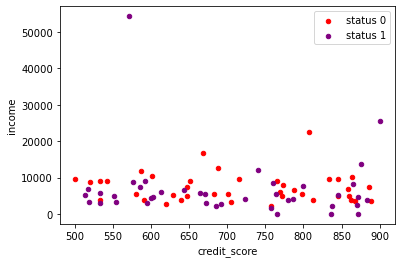

In [11]:
ax = loan[loan['status'] == 0][0:40].plot(kind = 'scatter',
                                                  x = 'credit_score',
                                                  y = 'income',
                                                  color = 'Red',
                                                  label = 'status 0');
ax = loan[loan['status'] == 1][0:40].plot(kind = 'scatter',
                                                  x = 'credit_score',
                                                  y = 'income',
                                                  color = 'Purple',
                                                  label = 'status 1',
                                                  ax = ax);
plt.show()

In [12]:
loan2 = loan1[['loan_amount', 'rate_of_interest', 'down_payment', 'term', 'property_value', 'income', 'credit_score', 'LTV']]
X = np.asarray(loan2)
X[0:5]

array([[-0.15366761, -0.05304852,  0.42578873, -1.04193993, -0.81348074,
         0.50235739,  0.63703413,  0.62397036],
       [ 2.16747039, -0.29616336,  0.42578873, -0.79402016, -0.30390735,
        -1.27541323,  0.65070074, -2.60904302],
       [ 0.75221293, -0.8187991 ,  0.42578873,  0.03237908,  0.40383346,
         1.15823392,  0.17216995,  0.71634217],
       [ 0.21389414, -0.6883077 ,  0.42578873,  0.44557869,  0.78129523,
        -0.97336482, -0.09227046,  0.34685492],
       [-0.22023391, -1.00004244,  0.42578873,  0.72104511,  0.55481817,
        -0.84391551,  0.4670248 ,  0.06973949]])

In [13]:
loan['status'] = loan['status'].astype('int')
y = np.asarray(loan['status'])

y [0:5]

array([1, 1, 0, 0, 0])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
##print ('Train set:', X_train.shape, y_train.shape)
##print ('Test set:', X_test.shape, y_test.shape)

In [15]:
clf = svm.SVC(kernel = 'rbf')

In [16]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
yhat = clf.predict(X_test)
yhat[0:5]

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, average = 'micro')

In [ ]:
print('SVM Accuracy', metrics.accuracy_score(yhat, y_test))

In [ ]:
sns.countplot(data = loan, x = 'status')

In [ ]:
colors =sns.color_palette('deep')
sns.heatmap(data=loan[[ 'loan_amount', 'rate_of_interest', 'down_payment', 'term', 'property_value', 'income', 'credit_score', 'LTV']].corr(), annot=True, color=colors)

In [ ]:
plt.figure(figsize=(20, 30))

sns.scatterplot(data = loan, x = "credit_score", y = "loan_amount",
               hue = "status", size = "loan_type",
               sizes = (40, 300), palette = "pastel")

plt.show()